# 석차를 이용한 모집단 추정

  먼저 필자는 통계학에 관한 전문가가 아니므로 앞으로의 추론에 논리적 오류가 있거나 현대 통계학에서 사용되는 용어와 이 글의 용어가 다를 수 있습니다. 양해 부탁드립니다.


## 주어진 데이터

![title](Images/seongjeokpyo.jpg)

 ![title](Images/seongjeokpyo2.jpg)
 
 
 ### 요약
 
 1447.7점 : 7/380
 
  811.1점 : 240/380
  
  
  
  
  ## 추론
  
  먼저 모집단을 풍파고 학생과 동일한 수준 분포의 무한한 학생들이 동일한 시험을 쳤을때 받을 성적으로 정의하자. 이때 성적의 분포를 정규분포로 가정하고 받을 수 있는 점수의 범위도 실수 전체라고 가정해보자.
  주어진 데이터는 단 2명의 데이터로 전교생(n=380)에 비하면 매우 작은 수이다. 그러나 위 데이터에는 석차라는 데이터가 있으므로 신뢰도 100%의 유의미한 학생 전체 평균 점수의 존재 구간을 알 수 있다. 먼저 학생들을 3개의 집단 A, B, C로 나누어 보자. A는 1447.7점 초과의 학생들로 n(A)=6, B는 1447.7점 이하이고 811.1점 초과의 학생들로 n(B)=232, C는 811.1점 이하의 학생들로 n(C)=140이다. 
  이때 각 group의 평균을 m(group)이라고 할때 전체 학생의 점수 평균 M은
  ### M = (6/380)* m(A) +  (1/380)* 1447.7 + (232/380)* m(B) + (1/380)* 811.1 + (140/380)* m(C)
  
  이다. 이때 각 group 평균의 범위는 group 원소 범위와 같으므로 M은 1212.3136842105 이하 524.0005263158 초과 이다.

In [223]:
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import beta
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from sympy import Symbol, solve

In [224]:
#위와 마찬가지로 전체 학생의 분산의 최대값을 구해보자
#분산이 최대가 되기위해서는 점수가 평균점수로부터의 차이가 커야한다
A=np.full((233,6),1500)
B=np.full((233,232),636.6)
B=np.triu(B, -1)
C=np.full((233,140),0)
e=np.full((233,1),1447.7)
f=np.full((233,1),811.1)
D=np.concatenate((e, f), axis=1)
max=np.concatenate((A,B), axis=1)
max=np.concatenate((max,C), axis=1)
max=np.concatenate((max,D), axis=1)
max_df=pd.DataFrame(max)
var=max_df.var(axis=1)
std=max_df.std(axis=1)
#print(var,std)
print("\n분산의 최대값 : ", var.max())
print("\n표준편차의 최대값 : ", std.max())


분산의 최대값 :  125556.51545340937

표준편차의 최대값 :  354.33954824914673


In [225]:
#위와 마찬가지로 전체 학생의 분산의 최솟값을 구해보자
#엄밀히 말하자면 A group의 성적은 1447.7초과이므로
#표준편차와 분산은 앞으로 구하는 최솟값?을 초과해야한다.
#다만 여기서는 그 값을 최솟값으로 표기하겠다.
#분산이 최소가 되기위해서는 평균과 점수가 가장 가까워야한다.
#이를 위해서는 Bgroup의 평균이 전체 평균과 같아야한다.

meanB = Symbol('meanB')  #B group의 평균
equation ={(6/380)*1447.7  + (1/380)* 1447.7 + (232/380-1)* meanB + (1/380)* 811.1 + (140/380)*811.1 }
result = solve(equation,dict=True)
print("result => ", result)

result =>  [{meanB: 841.209459459459}]


In [248]:
#이때 분산과 표준편차를 구하자
A=np.full((1,7),1447.7)
B=np.full((1,232),841.209459459459)
C=np.full((1,141),811.1)
min = np.concatenate((A,B), axis=1)
min = np.concatenate((min,C), axis=1)
var=min.var(axis=1)
std=min.std(axis=1)
#print(var,std)
print("\n분산의 최솟값 : ", var.max())
print("\n표준편차의 최솟값 : ", std.max())


분산의 최솟값 :  7112.218807254622

표준편차의 최솟값 :  84.333971845601


In [249]:
#모수가 정규분포일때 평균과 분산을 구해보자
rv = sp.stats.norm(loc=0, scale=1)

print(rv.ppf(373/380)) #7등 분위수값
print(rv.ppf(20/380))
print(rv.ppf(353/360))
print(rv.ppf(120/360)) 

# 평균 +  분산*2.0875094772894123= 1446.7
# 평균 +  분산*-1.6198562586382699= 450
A = np.array([[1,2.0875094772894123],[1,-1.6198562586382699]])
B = np.array([1446.7, 450])
C = np.linalg.solve(A, B)
print(C)

2.0875094772894123
-1.6198562586382699
2.0653606500222765
-0.43072729929545756
[885.48731039 268.84318165]


In [364]:
xpdf, ypdf = np.meshgrid(pdf1,pdf2)
xypdf = (xpdf*ypdf) #각xy의 확률 밀도에 비례
xypdf.min()

0.0

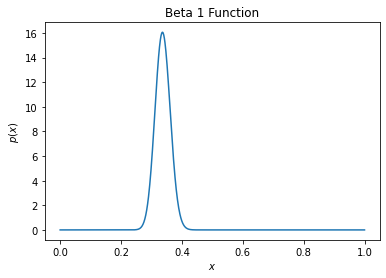

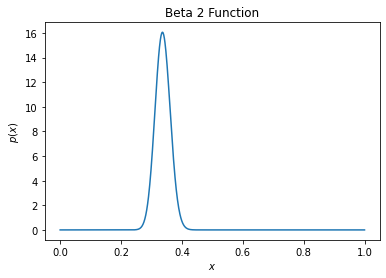

In [322]:
%matplotlib inline
# 모집단에서 점수가 1447.7을 초과할 화률의 분포
beta1=  sp.stats.beta(a=7, b=375,)
xx = np.linspace(0, 1, 1000)
pdf1 = beta1.pdf(xx)
plt.plot(xx, pdf)
plt.title("Beta 1 Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

# 모집단에서 점수가 811.1이하일 화률의 분포
beta2=  sp.stats.beta(a=122, b=240,)
pdf2 = beta2.pdf(xx)
plt.plot(xx, pdf)
plt.title("Beta 2 Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [269]:
x_mat = np.array([xx])
#yy=xx[:,np.newaxis]
y_mat=x_mat.T
xy_mat=y_mat@x_mat

In [365]:
xv, yv = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000),sparse=True)
"""for x in range(1000):
    for y in range(1000):
        if (x-y<5)or(x>y):
            xv[x,y]=0
            yv[x,y]=0"""

'for x in range(1000):\n    for y in range(1000):\n        if (x-y<5)or(x>y):\n            xv[x,y]=0\n            yv[x,y]=0'

In [366]:
yv.shape

(1000, 1)

In [284]:
# 평균 +  표준편차*1447.7점의 분위수= 1446.7
# 평균 +  표준편차*811.1점의 분위수= 811.1
def solver(x,y):
    A = np.array([[1,x],[1,y]])
    B = np.array([1446.7, 811.1])
    try:
        C = np.linalg.solve(A, B)
    except Exception:
        return np.array([0,0])
    #if (1213<C[0])or(524>C[0]):
    if (10000<C[0])or(1>C[0]):
        return np.array([0,0])
    #if (C[1]>354.33954824914673)or (84.333971845601>C[1]):
    if (10000<C[1])or(1>C[1]):
        return np.array([0,0])
    return C
solver = np.vectorize(solver, signature='(),()->(k)', otypes=[np.ndarray])


np.set_printoptions(threshold=sys.maxsize)
C=solver(xv,yv)
C=np.nan_to_num(C, nan=0, posinf=0, neginf=0)

In [273]:
#solver test
solver(2,-1)
print(type(C))
print(C.shape)
print(np.max(C[:,:,0]))

<class 'numpy.ndarray'>
(1000, 1000, 2)
1212.9997455470739


In [287]:
C = C.astype(float)
D = C[:,:,0]
D.dtype, D.shape

(dtype('float64'), (1000, 1000))

In [308]:
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf_mean = ax.plot_surface(xv, yv, C[:,:,0], cmap='jet')

fig.colorbar(surf_mean, shrink=0.6, aspect=8)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.set_zlim(0, 200)

plt.tight_layout()
#plt.show()

In [309]:
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf_std = ax.plot_surface(xv, yv, C[:,:,1], cmap='jet')
fig.colorbar(surf_std)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.set_zlim(0, 200)

plt.tight_layout()
plt.show()

In [313]:
#동시에 보기는 힘듬
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


surf_std = ax.plot_surface(xv, yv, C[:,:,0], cmap='autumn')
surf_std = ax.plot_surface(xv, yv, C[:,:,1], cmap='winter')

fig.colorbar(surf_std, shrink=0.6, aspect=8)
ax.set_xlabel('mean')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.set_zlim(0, 200)

plt.tight_layout()
plt.show()

In [315]:
C.shape
type(C)

numpy.ndarray

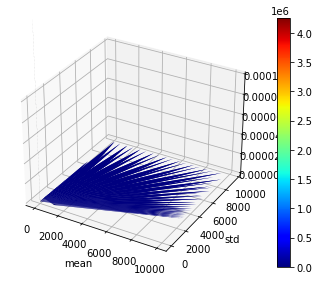

In [356]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf_std = ax.plot_surface(C[:,:,0], C[:,:,1], xypdf, cmap='jet')
fig.colorbar(surf_std)
ax.set_xlabel('mean')
ax.set_ylabel('std')
ax.set_zlabel('possibility')
ax.set_zlim(0, 0.0001)

plt.tight_layout()
plt.show()

(1000, 1000)